## Description


*1. NSF Research Awards Abstracts*

This dataset comprises several paper abstracts, one per file, that were furnished by the NSF
(National Science Foundation). A sample abstract is shown at the end.
Your task is developing an unsupervised model which classifies abstracts into a topic (discover
them!). 
Indeed, your goal is to group abstracts based on their semantic similarity.
You can get a sample of abstracts here. Be creative and state clearly your approach. Although
we don’t expect accurate results but a good pipeline of your work.

It is affordable to create a notebook, like Jupyter (if you use python) or a Rmarkdown
report (in case you use R) and make it available for us, i.e. github.
Hint to success in your quest: Develop and stay clear of the data science process you'll
perform over the dataset and highlight important aspects you might consider affordable
to discuss over.
Aside notes: All fields in every abstract file wouldn’t be needed. Be keen.
Good luck and have fun.

In [214]:
#!pip install -r  ../requirements.txt

     ---------------------------------------- 7.2/7.2 MB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 KB 2.8 MB/s eta 0:00:00
     ------------------------------------- 930.9/930.9 KB 29.7 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 26.0 MB/s eta 0:00:00


## General libraries required

In [3]:
from zipfile import ZipFile 
import pandas as pd 
import numpy as np
import matplotlib as plt
import nltk
import re # regex
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords # library that help removing stop words
from nltk.tokenize import RegexpTokenizer#split the text into tokens 
from nltk.stem import WordNetLemmatizer#Normalize words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mauricio.obando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mauricio.obando\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mauricio.obando\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Problem: Your task is developing an unsupervised model which classifies abstracts into a topic
*   Group abstracts based on their semantic similarity.
*   Be creative and state clearly your approach

# Preprocessing
One of the most important things when working with text and type of NLP related models first the process of preprocessing to get rid of the common words like "the","or", "a" and punctuation symbols.
That is why this the first part of the process.

In this case one of the important aspects to take into account is to remove special tags that by default uses XML to normalize the data

In [4]:
file_read=ZipFile('../data/2020.zip')
df_abstracts=pd.DataFrame()
for i in file_read.namelist():
    open_xml=file_read.open(i)
    df_abstracts=df_abstracts.append(pd.read_xml(open_xml),ignore_index=True)

In [5]:
df_abstracts.head(2).T

,0,1
AwardTitle,Collaborative Research: Excellence in Research...,Workshop on Replication of a Community-Engaged...
AGENCY,NSF,NSF
AwardEffectiveDate,07/01/2020,01/01/2020
AwardExpirationDate,06/30/2023,12/31/2022
AwardTotalIntnAmount,229338.0,27438.0
AwardAmount,345460,27438
AwardInstrument,NaN,NaN
Organization,NaN,NaN
ProgramOfficer,NaN,NaN
AbstractNarration,Head and heart development are closely intertw...,The National Academy of Engineering identified...


In [6]:
df_abstracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13285 entries, 0 to 13284
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardTitle               13285 non-null  object 
 1   AGENCY                   13285 non-null  object 
 2   AwardEffectiveDate       13285 non-null  object 
 3   AwardExpirationDate      13285 non-null  object 
 4   AwardTotalIntnAmount     13285 non-null  float64
 5   AwardAmount              13285 non-null  int64  
 6   AwardInstrument          0 non-null      float64
 7   Organization             0 non-null      float64
 8   ProgramOfficer           0 non-null      float64
 9   AbstractNarration        13144 non-null  object 
 10  MinAmdLetterDate         13285 non-null  object 
 11  MaxAmdLetterDate         13285 non-null  object 
 12  ARRAAmount               0 non-null      float64
 13  TRAN_TYPE                13285 non-null  object 
 14  CFDA_NUM              

In [7]:
#Understanding about the data that the Awardid is unique in this case since normally on papers the unique identifier is DOI
df_abstracts[df_abstracts['AwardID']==(df_abstracts['AwardID'].value_counts().reset_index(name='reset').reset>1).index]

,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardTotalIntnAmount,AwardAmount,AwardInstrument,Organization,ProgramOfficer,AbstractNarration,...,AwardID,Investigator,Institution,Performance_Institution,ProgramElement,ProgramReference,Appropriation,Fund,FUND_OBLG,POR


In [8]:
df_abstracts.AbstractNarration.sample(5)

613      This award is made as part of the FY 2020 Math...
9549     This project will study the chemistry of arche...
10420    This project aims to serve the national intere...
4185     With establishment of an agreed-upon legal def...
5715     This project aims to understand how cold front...
Name: AbstractNarration, dtype: object

In [9]:
#Removing links if any
df_abstracts.AbstractNarration=df_abstracts.AbstractNarration.astype(str)
df_abstracts['clean_abstract']=df_abstracts.AbstractNarration.apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
#Removing Punctuation
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'/\()@#_-]", " ", s).split()))
#Removing xml tags
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("<[^<]+?>", " ", s).split()))
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("br/?\s?>", " ", s).split()))

#Remove another special characters
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda s: ' '.join(re.sub("[%$]", " ", s).split()))

#Remove Numbers
df_abstracts.clean_abstract.replace('\d+', '', regex=True, inplace=True)

df_abstracts[['AbstractNarration','clean_abstract']].sample(10)

,AbstractNarration,clean_abstract
5389,The National Science Foundation Research Train...,The National Science Foundation Research Train...
2310,Supermassive black hole (SMBH) mergers are one...,Supermassive black hole SMBH mergers are one o...
10641,Part I: Non-technical description: ...,Part I Non technical description Water is life...
2412,Almost every aspect of our physical world is d...,Almost every aspect of our physical world is d...
11884,Evolution underlies the amazing diversity of l...,Evolution underlies the amazing diversity of l...
11402,The recent surge in the applications of machin...,The recent surge in the applications of machin...
11927,The project aims to serve the national need of...,The project aims to serve the national need of...
1097,"With this award, the Macromolecular, Supramole...",With this award the Macromolecular Supramolecu...
10424,Computer technology for speech recognition has...,Computer technology for speech recognition has...
7171,Authentication is one of the fundamental primi...,Authentication is one of the fundamental primi...


In [10]:
df_abstracts=df_abstracts[~df_abstracts.AbstractNarration.isna()]

In [11]:
#This are all the stop words related to english
stop_words = set(stopwords.words('english'))
print(stop_words)

{'yourselves', 'won', 'her', 'over', 'that', 'ain', 'against', 't', 'only', 'who', 'and', 'until', 'some', 'needn', 'which', "don't", "didn't", 'this', 'again', "mightn't", "haven't", 'were', 's', 'as', 'we', 'too', 'does', "aren't", "doesn't", 'hadn', "you'll", 'being', 'up', 'down', 'yourself', 'didn', 'an', 'own', "that'll", 'he', "isn't", 'ma', "you're", 'such', 'theirs', 'why', 'what', 'a', 'under', 'doesn', 'be', 'ours', 'them', 'mustn', 'your', 'below', 'so', 'doing', 'will', 'of', 'y', 'yours', 'through', 'few', 'him', 'at', 'hers', 'or', 'more', 'couldn', 'shouldn', 'itself', 'on', 'off', 'both', 'are', 'she', "shan't", 'nor', 'hasn', 'not', 'whom', 'by', 'should', 'its', 'been', 'aren', 'mightn', 'because', 'himself', 'before', 'am', 'those', 'did', 'other', 'my', 'haven', 'll', "she's", 'now', 'our', "it's", 'very', "hasn't", 'about', 'each', 'how', 'herself', 'is', 'has', 'do', 'further', 'myself', 'm', 'it', 'for', 'i', 'was', 'into', 'have', 'd', 'o', 'don', 'with', 'any'

In [12]:
def remove_stop_words(text_input):
    words_array=text_input.lower().split()
    without_stop_words=[i for i in words_array if i not in stop_words ]
    join_text_back_again=' '.join(without_stop_words)
    return join_text_back_again

In [13]:
df_abstracts.clean_abstract=df_abstracts.clean_abstract.apply(lambda x: remove_stop_words(x))
df_abstracts[['AbstractNarration','clean_abstract']].sample(10)

,AbstractNarration,clean_abstract
10458,Disasters over the years have shown that a dis...,disasters years shown disproportionate number ...
7310,The project supports research toward developme...,project supports research toward development e...
5616,This project will focus on environmental and s...,project focus environmental social changes acc...
8066,As part of its overall strategy to enhance lea...,part overall strategy enhance learning informa...
4917,nan,nan
12928,Algebraic combinatorics leverages the power of...,algebraic combinatorics leverages power algebr...
2171,"Over the last decade, distributed computing an...",last decade distributed computing big data ana...
7971,"For nearly four decades, the National Science ...",nearly four decades national science foundatio...
12847,There is a 99.7% chance a magnitude 6.7 earthq...,chance magnitude earthquake larger strike cali...
2109,The design of more efficient processors is a m...,design efficient processors major driving forc...


In [15]:
#convert each to a list of words
tokeniser = RegexpTokenizer(r'\w+')
df_abstracts['array_cleaning'] = df_abstracts.clean_abstract.apply(lambda x: tokeniser.tokenize(x))
df_abstracts[['AbstractNarration','clean_abstract','array_cleaning']].sample(10)

,AbstractNarration,clean_abstract,array_cleaning
10254,"In the United States, flooding is a leading ca...",united states flooding leading cause natural d...,"[united, states, flooding, leading, cause, nat..."
1183,"With this award, the Macromolecular, Supramole...",award macromolecular supramolecular nanochemis...,"[award, macromolecular, supramolecular, nanoch..."
8090,This project aims to serve the national intere...,project aims serve national interest improving...,"[project, aims, serve, national, interest, imp..."
978,Abstracts for RUI: Modulation of cation exchan...,abstracts rui modulation cation exchange using...,"[abstracts, rui, modulation, cation, exchange,..."
4736,The mGuard project aims to address two major d...,mguard project aims address two major data acc...,"[mguard, project, aims, address, two, major, d..."
6076,Microbes associated with marine invertebrates ...,microbes associated marine invertebrates broad...,"[microbes, associated, marine, invertebrates, ..."
3217,This NSF INCLUDES planning grant is funded by ...,nsf includes planning grant funded nsf inclusi...,"[nsf, includes, planning, grant, funded, nsf, ..."
1352,This research examines strategies for generati...,research examines strategies generating contro...,"[research, examines, strategies, generating, c..."
2365,These astronomers seek to understand what caus...,astronomers seek understand causes clouds gas ...,"[astronomers, seek, understand, causes, clouds..."
4953,Phytoplankton constitute the base of the marin...,phytoplankton constitute base marine food web ...,"[phytoplankton, constitute, base, marine, food..."


In [16]:
#Normalizing words is that play=plays and like if they are plural should also be in the same..in this case lemmatiser helps with that
lemmatiser = WordNetLemmatizer()
df_abstracts.array_cleaning = df_abstracts.array_cleaning.apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df_abstracts[['AbstractNarration','clean_abstract','array_cleaning']].sample(10)

,AbstractNarration,clean_abstract,array_cleaning
5217,This project aims to serve the national intere...,project aims serve national interest improving...,"[project, aim, serve, national, interest, impr..."
3972,Despite many efforts to increase diversity amo...,despite many efforts increase diversity among ...,"[despite, many, efforts, increase, diversity, ..."
1695,The ever-increasing demand for optimized large...,ever increasing demand optimized large scale c...,"[ever, increase, demand, optimize, large, scal..."
7901,Space-based remote sensing is widely used to m...,space based remote sensing widely used measure...,"[space, base, remote, sense, widely, use, meas..."
6683,Evolutionary cell biology is an emerging field...,evolutionary cell biology emerging field poten...,"[evolutionary, cell, biology, emerge, field, p..."
5578,Viral contamination of drinking water can caus...,viral contamination drinking water cause disea...,"[viral, contamination, drink, water, cause, di..."
5098,The Louis Stokes Alliances for Minority Partic...,louis stokes alliances minority participation ...,"[louis, stoke, alliances, minority, participat..."
7311,Engineering faculty bring an important perspec...,engineering faculty bring important perspectiv...,"[engineer, faculty, bring, important, perspect..."
1060,With support from the Chemical Measurement and...,support chemical measurement imaging program c...,"[support, chemical, measurement, image, progra..."
6280,This award supports fundamental research to un...,award supports fundamental research uncover fa...,"[award, support, fundamental, research, uncove..."


### Conclusions of Preprocessing

*   Total of Nans 141: treatment in this case they are being dropped(time) but normally there is another ways to solve nans like inputting data that whith the median frequency in words or average.
*   Total of documents: 13285
* DOI is normally the unique id in papers in this case the AWARDID


## Bag of Words

Is one of the simplest methods of to transform a fixed lenght of vector of words, to be compared in terms of its frequency. Is one more related to topic modelling so in this case it apply to make a discover of which topics are the most common in apstracts.

In [184]:
from sklearn.feature_extraction.text import CountVectorizer#this library is also used to make this counting
abstract_to_list=df_abstracts.array_cleaning.drop_duplicates().to_list()

In [188]:
concatenate_words=np.unique(np.concatenate(abstract_to_list))
word_final_list=[i for i in concatenate_words if i not in stop_words ]

47612

In [205]:
#function to define matrix of frecuencies
def calculate_bag_of_words(wordset,l_doc):
  general_count=[]
  tf_diz={}
  for i in wordset:  
    for j in l_doc:
        general_count.append(j.count(i))
    tf_diz[i]=general_count
    general_count=[]
        
  return pd.DataFrame(tf_diz)

In [206]:
#This takes a while to run
BOW=calculate_bag_of_words(word_final_list,abstract_to_list)

In [2]:
#BOW.to_csv('bow.csv') # just if the kernel dies you have an starting point
#BOW=pd.read_csv('bow.csv')

In [215]:
BOW.head()

,aa,aaa,aaai,aaas,aabw,aac,aacse,aacte,aag,aaibs,...,ﬁsheries,ﬁshery,ﬁxate,ﬂavor,ﬂexibility,ﬂora,ﬂow,ﬂuorescence,𝛿c,𝛿n
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is another way of doing it through sklearn countVectorizer
vectorizer = CountVectorizer(stop_words='english')
X=vectorizer.fit_transform(df_abstracts.AbstractNarration.tolist())
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

* As it shows this matrix have still characters we normally don`t want as topics like aa or aaa or aaai there is one solution for that and part of why we start with the bag of words is because there is another algorith that takes as input this matrix and discard this features..this is the TF-IDF (Term Frequenc-Inverse Document Frequency)

## TF_IDF

is principally described as the frequency of a word within a document times the frequency accross all documents:
$$TF-IDF(t,d)=TF(t,d)X IDF(t)$$
for a word $t$ in document $d$.
$$IDF(t)=\log\frac{\textrm{Total Number of documents}}{\textrm{Number documents contains t}}$$
$$TF(t,d)=\frac{\textrm{Number of times t appears in d}}{\textrm{Total number of words in d}}$$

In [99]:
from numpy import linalg#normalization by an l2 norm
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
#calculating the term frequency according to each document
tf_td=BOW/BOW.sum(axis=1)

0        344
1        253
2        213
3        249
4        223
        ... 
11035    188
11036    348
11037    215
11038    214
11039    237
Length: 11040, dtype: int64

In [234]:
#This is the idf with a correction to take so the log function does not go to -inifinity
idf=np.log(((1+BOW.shape[1])/(1+BOW.sum(axis=0))))+1

In [236]:
#this is the dot product of the matrix of the total values
tf_idf=np.dot(tf_td,idf)
#since is this the last step we is compute expensive and the allocations this will be the result of all the t 

In [19]:
#this is the sklearn using the same algorithm put above but less comput expensive so we star working with this
vectorizer = TfidfVectorizer(analyzer='word',stop_words='english',norm='l2')
response = vectorizer.fit_transform(df_abstracts.clean_abstract.to_list())
df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns=vectorizer.get_feature_names_out())
df_tfidf_sklearn

,aa,aaa,aaai,aaas,aabw,aac,aacse,aacte,aag,aaibs,...,ﬁsheries,ﬁshery,ﬁxate,ﬂavor,ﬂexibility,ﬂora,ﬂow,ﬂuorescence,𝛿c,𝛿n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\mauricio.obando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mauricio.obando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


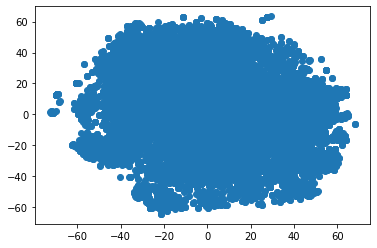

In [127]:
tsne=TSNE(2,perplexity=45, learning_rate=100,metric="cosine")
tsne_result=tsne.fit_transform(df_tfidf_sklearn)
plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
plt.show()

In [128]:
from sklearn.cluster import KMeans
km_2=KMeans(15)
km_2.fit(df_tfidf_sklearn)

KMeans(n_clusters=15)

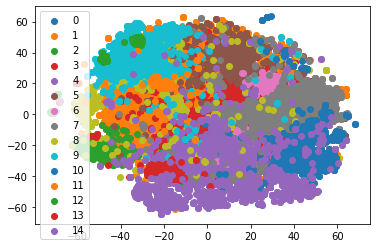

In [129]:
for i in range(km_2.n_clusters):
    plt.scatter(tsne.embedding_[km_2.labels_==i,0],tsne.embedding_[km_2.labels_==i,1],label=str(i))
plt.legend()
plt.show()